In [37]:
# Import all the required libraries
import pandas as pd
import numpy as np

# Imports for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# imports for model building
from sklearn.model_selection import train_test_split
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# LR
from sklearn.linear_model import LogisticRegression
# improving LR
from sklearn.pipeline import make_pipeline
#DTR
from sklearn.tree import DecisionTreeClassifier
#DTR cross validation
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [38]:
# load dataset 
traffic_data = pd.read_csv("D:/600/traffic project/traffic-volume-survey.csv")
# traffic dataset
traffic_data

,geo_point_2d,geo_shape,latitude,longitude,road_name,installed_year,range,type,date,easting,...,projection,postcode,pc85th_kmh,volume_12h,volume_24h,comm_vhcl,peakvol,suburb_name,ward_name,gisfid
0,"-38.1216300043, 145.2924700205","{""coordinates"": [145.2924700205, -38.121630004...",-38.121630,145.292470,ANNABELLA STREET,2022,Between 50km/h and 60km/h,W,2022-08-24,350326,...,MGA2020 zone 55,3977,50.5,546,658,3.15,10.27,CRANBOURNE EAST,BALLA BALLA,506
1,"-38.0790430044, 145.3301540239","{""coordinates"": [145.3301540239, -38.079043004...",-38.079043,145.330154,ALISMA BOULEVARD,2022,Between 50km/h and 60km/h,W,2022-08-24,353544,...,MGA2020 zone 55,3977,56.8,2790,3708,2.72,10.85,CRANBOURNE NORTH,SPRINGFIELD,514
2,"-38.0973230017, 145.2458930241","{""coordinates"": [145.2458930241, -38.097323001...",-38.097323,145.245893,QUARTERS BOULEVARD,2022,Less than 30km/h,W,2022-08-24,346192,...,MGA2020 zone 55,3977,27.0,368,402,3.24,16.79,CRANBOURNE WEST,MAYFIELD,517
3,"-37.9748000045, 145.2722920164","{""coordinates"": [145.2722920164, -37.974800004...",-37.974800,145.272292,HANNA DRIVE,2022,Between 50km/h and 60km/h,W,2022-08-24,348254,...,MGA2020 zone 55,3802,54.2,3661,4293,6.00,21.70,ENDEAVOUR HILLS,FOUR OAKS,520
4,"-38.0443360031, 145.2755090228","{""coordinates"": [145.2755090228, -38.044336003...",-38.044336,145.275509,CORAL DRIVE,2022,Between 50km/h and 60km/h,W,2022-08-24,348680,...,MGA2020 zone 55,3976,50.0,3244,4017,4.39,11.94,HAMPTON PARK,RIVER GUM,524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,"-38.056413, 145.291698","{""coordinates"": [145.291698, -38.056413], ""typ...",-38.056413,145.291698,RALEIGH DRIVE,2024,Between 50km/h and 60km/h,W,2024-02-07,350125,...,MGA2020 zone 55,3805,58.0,1380,1807,3.60,209.00,NARRE WARREN SOUTH,SPRINGFIELD,1309
1315,"-37.989649, 145.260863","{""coordinates"": [145.260863, -37.989649], ""typ...",-37.989649,145.260863,ROBERT MOLYNEUX AVENUE,2024,Between 40km/h and 50km/h,W,2024-02-05,347281,...,MGA2020 zone 55,3802,47.6,977,1309,4.65,117.00,ENDEAVOUR HILLS,FOUR OAKS,1310
1316,"-38.018022, 145.289537","{""coordinates"": [145.289537, -38.018022], ""typ...",-38.018022,145.289537,SPRINGFIELD DRIVE,2024,Between 40km/h and 50km/h,W,2024-02-07,349857,...,MGA2020 zone 55,3805,44.4,460,635,6.82,53.00,NARRE WARREN,SPRINGFIELD,1312
1317,"-38.068992, 145.301352","{""coordinates"": [145.301352, -38.068992], ""typ...",-38.068992,145.301352,THE STRAND,2024,Between 30km/h and 40km/h,W,2024-02-07,350998,...,MGA2020 zone 55,3805,37.0,254,296,4.07,46.00,NARRE WARREN SOUTH,SPRINGFIELD,1313


# Exploratory data analysis

In [39]:
#first few rows

traffic_data.head()

,geo_point_2d,geo_shape,latitude,longitude,road_name,installed_year,range,type,date,easting,...,projection,postcode,pc85th_kmh,volume_12h,volume_24h,comm_vhcl,peakvol,suburb_name,ward_name,gisfid
0,"-38.1216300043, 145.2924700205","{""coordinates"": [145.2924700205, -38.121630004...",-38.121630,145.292470,ANNABELLA STREET,2022,Between 50km/h and 60km/h,W,2022-08-24,350326,...,MGA2020 zone 55,3977,50.5,546,658,3.15,10.27,CRANBOURNE EAST,BALLA BALLA,506
1,"-38.0790430044, 145.3301540239","{""coordinates"": [145.3301540239, -38.079043004...",-38.079043,145.330154,ALISMA BOULEVARD,2022,Between 50km/h and 60km/h,W,2022-08-24,353544,...,MGA2020 zone 55,3977,56.8,2790,3708,2.72,10.85,CRANBOURNE NORTH,SPRINGFIELD,514
2,"-38.0973230017, 145.2458930241","{""coordinates"": [145.2458930241, -38.097323001...",-38.097323,145.245893,QUARTERS BOULEVARD,2022,Less than 30km/h,W,2022-08-24,346192,...,MGA2020 zone 55,3977,27.0,368,402,3.24,16.79,CRANBOURNE WEST,MAYFIELD,517
3,"-37.9748000045, 145.2722920164","{""coordinates"": [145.2722920164, -37.974800004...",-37.974800,145.272292,HANNA DRIVE,2022,Between 50km/h and 60km/h,W,2022-08-24,348254,...,MGA2020 zone 55,3802,54.2,3661,4293,6.00,21.70,ENDEAVOUR HILLS,FOUR OAKS,520
4,"-38.0443360031, 145.2755090228","{""coordinates"": [145.2755090228, -38.044336003...",-38.044336,145.275509,CORAL DRIVE,2022,Between 50km/h and 60km/h,W,2022-08-24,348680,...,MGA2020 zone 55,3976,50.0,3244,4017,4.39,11.94,HAMPTON PARK,RIVER GUM,524


In [40]:
# Information about the dataset
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   geo_point_2d    1319 non-null   object 
 1   geo_shape       1319 non-null   object 
 2   latitude        1319 non-null   float64
 3   longitude       1319 non-null   float64
 4   road_name       1319 non-null   object 
 5   installed_year  1319 non-null   int64  
 6   range           1319 non-null   object 
 7   type            1319 non-null   object 
 8   date            1319 non-null   object 
 9   easting         1319 non-null   int64  
 10  northing        1319 non-null   int64  
 11  projection      1319 non-null   object 
 12  postcode        1319 non-null   int64  
 13  pc85th_kmh      1319 non-null   float64
 14  volume_12h      1319 non-null   int64  
 15  volume_24h      1319 non-null   int64  
 16  comm_vhcl       1319 non-null   float64
 17  peakvol         1319 non-null   f

In [41]:
# describtion of data
data.describe()

,latitude,longitude,installed_year,easting,northing,postcode,pc85th_kmh,volume_12h,volume_24h,comm_vhcl,peakvol,gisfid
count,1319.000000,1319.000000,1319.000000,1319.000000,1.319000e+03,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,-38.066795,145.299181,2020.812737,350802.561789,5.785409e+06,3875.510235,51.968302,2038.299469,2584.727066,6.465360,38.900394,660.000000
std,0.054116,0.037674,1.854484,3321.597179,5.997133e+03,158.697572,10.791928,2529.950321,3258.954428,5.277923,145.615733,380.906813
min,-38.225106,145.226599,2018.000000,344695.000000,5.767858e+06,3156.000000,15.000000,0.000000,11.000000,0.000000,1.160000,1.000000
25%,-38.102350,145.265858,2019.000000,347870.500000,5.781410e+06,3805.000000,46.250000,380.500000,489.000000,3.390000,9.785000,330.500000
50%,-38.067303,145.298021,2021.000000,350701.000000,5.785355e+06,3975.000000,51.800000,1096.000000,1398.000000,4.880000,11.140000,660.000000
75%,-38.029082,145.329194,2022.000000,353396.500000,5.789626e+06,3977.000000,57.000000,2676.000000,3322.500000,7.500000,13.935000,989.500000
max,-37.950574,145.412960,2024.000000,361050.000000,5.798223e+06,3981.000000,102.000000,28264.000000,39101.000000,42.200000,2978.000000,1319.000000


In [42]:
# checking for missing values
data.isnull().sum()
# only having missing values of 4 ward names

geo_point_2d      0
geo_shape         0
latitude          0
longitude         0
road_name         0
installed_year    0
range             0
type              0
date              0
easting           0
northing          0
projection        0
postcode          0
pc85th_kmh        0
volume_12h        0
volume_24h        0
comm_vhcl         0
peakvol           0
suburb_name       0
ward_name         0
gisfid            0
dtype: int64

In [43]:
# checking unique values of ward to understand the attribute
data['ward_name'].unique()

array(['BALLA BALLA', 'SPRINGFIELD', 'MAYFIELD', 'FOUR OAKS', 'RIVER GUM',
       'EDRINGTON'], dtype=object)

In [44]:
# Count of each unique ward name
ward_name_counts = data['ward_name'].value_counts(dropna=False)  # 'dropna=False' includes the nan count
print(ward_name_counts)

ward_name
MAYFIELD       284
EDRINGTON      278
SPRINGFIELD    231
BALLA BALLA    194
RIVER GUM      175
FOUR OAKS      157
Name: count, dtype: int64


In [45]:
# Impute missing 'ward_name' values with the mode
mode_ward_name = data['ward_name'].mode()[0]
data['ward_name'].fillna(mode_ward_name, inplace=True)

In [46]:
# One last time checking for any remaining missing values
data['ward_name'].isnull().sum()

0

Now that there is no missing value. 

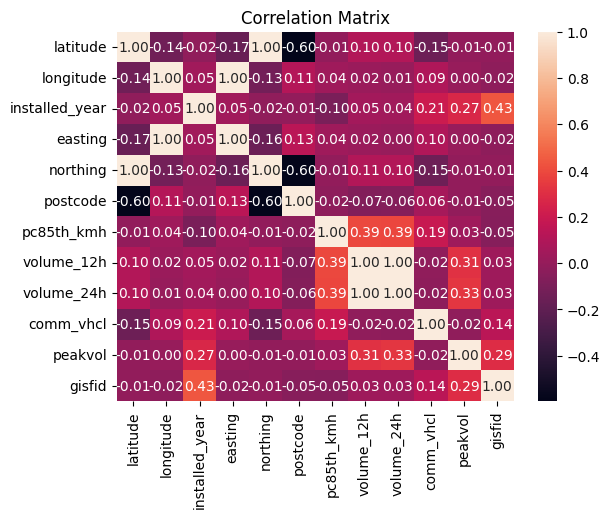

In [47]:
# Selecting only numeric columns for correlation
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

# Visualization of Correlation Matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

As there is not much correlation among variable we try to look out for range variable and try to understand the distribution it is holding in datast

We visualizing the range function as keeping it as a target variable

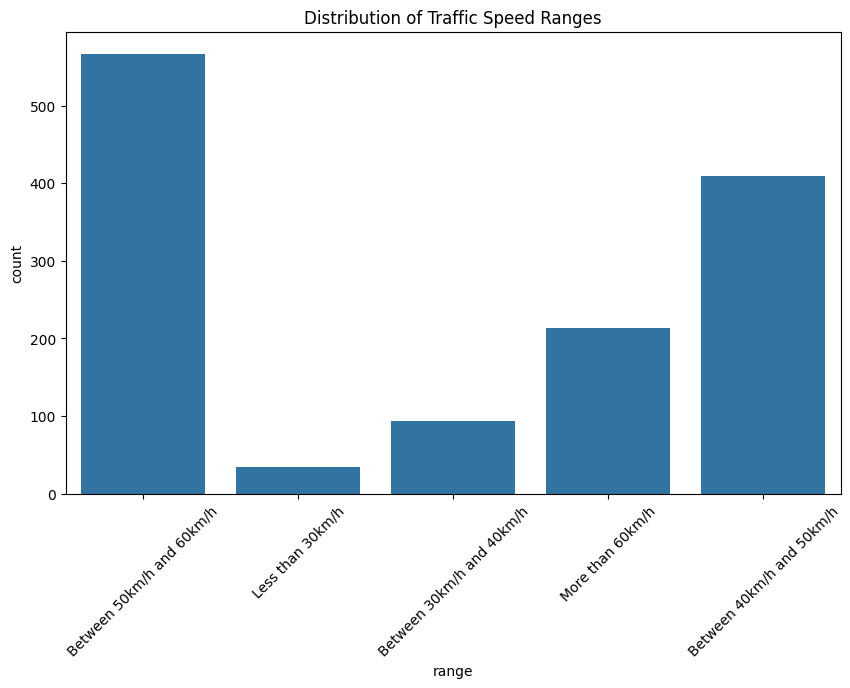

In [48]:
# visualizing range attribute to understand it better
plt.figure(figsize=(10, 6))

# Plotting the distribution of 'range'
sns.countplot(x='range', data=data)
plt.title('Distribution of Traffic Speed Ranges')

# Rotate x-axis labels at 45 degree
plt.xticks(rotation=45) 

# Display the plot
plt.show()


To get more insight in the dataset we try to make out a featured variable that will be holding categories and it will be predicted alongside of the range in the dataset

# Feature Engineerng

We'll update the data with the help of new feature 'traffic accomdation level',
we'll categorize the data with the help of range function into 4 categories.

speed_range ='Between 30km/h and 40km/h' or 'Less than 30km/h' then --> 'low'
speed_range = 'Between 40km/h and 50km/h' --> 'moderate'
speed_range = 'Between 50km/h and 60km/h' --> 'high'
speed_range = 'More than 60km/h'          --> 'Extremely high'

In [49]:
def categorize_traffic_accomodation_level_updated(speed_range):
    if speed_range == 'Between 30km/h and 40km/h' or speed_range == 'Less than 30km/h':
        return 'low'
    elif speed_range == 'Between 40km/h and 50km/h':
        return 'moderate'
    elif speed_range == 'Between 50km/h and 60km/h':
        return 'high'
    elif speed_range == 'More than 60km/h':
        return 'extremely high'
    else:
        # keeping it for exception handling (There is no such case in our data)
        return 'undefined'  

# Apply the updated categorization
traffic_data['traffic level'] = traffic_data['range'].apply(categorize_traffic_accomodation_level_updated)


In [50]:
# show the head for traffic accomodata data range
traffic_data[['range', 'traffic level']].head()

,range,traffic level
0,Between 50km/h and 60km/h,high
1,Between 50km/h and 60km/h,high
2,Less than 30km/h,low
3,Between 50km/h and 60km/h,high
4,Between 50km/h and 60km/h,high


As we have engineered the dataset's new attribute successfully we'll try to predict it with the use of Classification techniques.

# Model Building and Evaluation

In [51]:
#independent and dependent varaibles selection
X = traffic_data[['pc85th_kmh', 'volume_12h', 'volume_24h', 'comm_vhcl', 'peakvol']]
 # Target variable
y = traffic_data['range'] 

In [52]:
#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression

In [53]:
# Train a Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [54]:
# Predict on the test set
y_pred_logistic = logistic_model.predict(X_test)

In [55]:
# Evaluate the model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
report_logistic = classification_report(y_test, y_pred_logistic)

In [56]:
# Print the results
print("Accuracy of Logistic Regression:", accuracy_logistic)
print("Classification Report of Logistic Regression:\n", report_logistic)

Accuracy of Logistic Regression: 0.43686868686868685
Classification Report of Logistic Regression:
                            precision    recall  f1-score   support

Between 30km/h and 40km/h       0.00      0.00      0.00        21
Between 40km/h and 50km/h       0.46      0.05      0.09       124
Between 50km/h and 60km/h       0.44      0.91      0.59       171
         Less than 30km/h       0.00      0.00      0.00        10
         More than 60km/h       0.42      0.16      0.23        70

                 accuracy                           0.44       396
                macro avg       0.26      0.22      0.18       396
             weighted avg       0.41      0.44      0.32       396



# Improving Logistic Regression

As we have multiple features We can use feature scaling and adjacent to it work with class imbalances(class weight adjustment).

i)In feature scaling: We ensure to rectify the dominance of any standardization ranges.
ii) Class Weight Adjustment: We improve fairness across predictions with the help of balancing minority classes.
iii) Once both the above task are completed we combine the scale and train data which help boosting cross validation and stops data leakage.
iv) Optimization: These adjustments helps the model to learn better about the underlying patterns.

In [57]:
# Scaling features--> Step 1
scaler = StandardScaler()

In [58]:
# Adjust class weights--> Step 2
class_weights = 'balanced'

In [59]:
#Logistic Regression model with class weight adjustment --> Combining
log_reg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, class_weight=class_weights, random_state=42)

In [60]:
# Building the pipeline as we discussed --> Step 3
pipeline = make_pipeline(scaler, log_reg_model)

In [61]:
# Train the model with the help of pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    multi_class='multinomial',
                                    random_state=42))])

In [62]:
# Predict on the test set using the pipeline
y_pred_lr = pipeline.predict(X_test)

In [63]:
# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)

In [64]:
print("Adjusted Accuracy of Logistic Regression:", accuracy_lr)
print("Adjusted Classification Report of Logistic Regression:\n", report_lr)

Adjusted Accuracy of Logistic Regression: 0.9292929292929293
Adjusted Classification Report of Logistic Regression:
                            precision    recall  f1-score   support

Between 30km/h and 40km/h       0.56      0.95      0.70        21
Between 40km/h and 50km/h       0.99      0.83      0.90       124
Between 50km/h and 60km/h       0.97      0.96      0.97       171
         Less than 30km/h       0.91      1.00      0.95        10
         More than 60km/h       0.93      1.00      0.97        70

                 accuracy                           0.93       396
                macro avg       0.87      0.95      0.90       396
             weighted avg       0.95      0.93      0.93       396



In [65]:
#Saving the logisti model
joblib.dump(pipeline, 'log_model.pkl')

['log_model.pkl']

# Adjusted classification report analysis

i) Improved Recall: We now have enhanced ability to identify positive instances correctly.
ii) Precision and Recall are balanced: We have improved model fairness, which is highly important for cases which are sensitive to misclassification costs.
iii) High Macro AVG Scores: Ensuring robustness across diverse class distributions
iv) Data Preprocessing Effectiveness: Feature scaling and class weight adjustment has boosted model accuracy.

We can successfully summarize improvement in outcome of LR adjustment, pronouncing methodological enhancement and practical implication.

# Random Forest

In [66]:
# Initialize and train the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [67]:
# Predict on the test set
y_pred = model.predict(X_test)

In [68]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
decsion_tree_report = classification_report(y_test, y_pred)

In [69]:
# Save the optimized model
# Save the optimized model
joblib.dump(model, 'rf_model.pkl')

print(accuracy)

0.9949494949494949


In [70]:
# checking the report 
print(decsion_tree_report)

                           precision    recall  f1-score   support

Between 30km/h and 40km/h       0.95      1.00      0.98        21
Between 40km/h and 50km/h       1.00      1.00      1.00       124
Between 50km/h and 60km/h       1.00      0.99      1.00       171
         Less than 30km/h       1.00      0.90      0.95        10
         More than 60km/h       0.99      1.00      0.99        70

                 accuracy                           0.99       396
                macro avg       0.99      0.98      0.98       396
             weighted avg       1.00      0.99      0.99       396



In [71]:
# Working fine for random forest

# Decision Tree

In [72]:
# Train a Decision Tree model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [73]:
# Predict on the test set
y_pred_tree = decision_tree_model.predict(X_test)

In [74]:
# Evaluate the model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
report_tree = classification_report(y_test, y_pred_tree)

In [75]:
# checking the report 
print(report_tree)

                           precision    recall  f1-score   support

Between 30km/h and 40km/h       1.00      1.00      1.00        21
Between 40km/h and 50km/h       1.00      1.00      1.00       124
Between 50km/h and 60km/h       1.00      1.00      1.00       171
         Less than 30km/h       1.00      1.00      1.00        10
         More than 60km/h       1.00      1.00      1.00        70

                 accuracy                           1.00       396
                macro avg       1.00      1.00      1.00       396
             weighted avg       1.00      1.00      1.00       396



In [76]:
#Saving the decison tree model
joblib.dump(decision_tree_model, 'dec_model.pkl')

['dec_model.pkl']

# Why the decision tree might show Perfect score

i) Overfitting: DT are prone to overfit and they can perform exceptionally on the training data or the split test set but may not generalize well to unseen data.
ii) Characteristics of Dataset: If the data doesn't have much noise it can perform extremely well on dataset or data might have very distinct values that make DT easy to classify the test set.

# Let's verify and test the model

# Cross Validation

In [77]:
scores = cross_val_score(decision_tree_model, X, y, cv=5)
print("Cross-validated scores:", scores)


Cross-validated scores: [1. 1. 1. 1. 1.]


The Cross validation shows perfect scores which indeed suggest exceptional work. We can work more to validate the model.

# To check the robustness of the model we can:
i) Challenge with noisy data

# noisy data

In [78]:
# Create a copy of your test data --> which will help introduce noise
X_test_noisy = X_test.copy()

In [79]:
# Introduce random noise
# Adjusting 5% of the feature's range that means I will be multiplying the test set with 0.5
noise_factor = 0.05 
for column in X_test_noisy.columns:
    noise = np.random.randn(len(X_test_noisy[column])) * noise_factor * X_test_noisy[column].std()
    X_test_noisy[column] += noise

In [80]:
# Using trained model to make predictions on the noisy test set
y_pred_noisy = decision_tree_model.predict(X_test_noisy)

In [81]:
# Evaluate the model on the noisy test set
accuracy_noisy = accuracy_score(y_test, y_pred_noisy)
report_noisy = classification_report(y_test, y_pred_noisy)

In [82]:
print("Noisy Data Test Accuracy:", accuracy_noisy)
print("Noisy Data Test Report:\n", report_noisy)

Noisy Data Test Accuracy: 0.9545454545454546
Noisy Data Test Report:
                            precision    recall  f1-score   support

Between 30km/h and 40km/h       0.88      1.00      0.93        21
Between 40km/h and 50km/h       0.97      0.92      0.94       124
Between 50km/h and 60km/h       0.95      0.96      0.96       171
         Less than 30km/h       1.00      1.00      1.00        10
         More than 60km/h       0.97      0.97      0.97        70

                 accuracy                           0.95       396
                macro avg       0.95      0.97      0.96       396
             weighted avg       0.96      0.95      0.95       396



# Analysis Report of NOISY DATA

i) High Robustness: It worked well against noise this means the model is robust against variations and pertubations.
ii) Category Specific Perfermance: We are predicting all classes with high accuracy especialy for class ''Less than 30km/h'. Which shows how well our model has performed.